In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_energy_data.csv')
data.head()
 

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [4]:
data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [5]:
data.duplicated().sum()

0

## Encoding

In [6]:
data.head()
data["Building Type"].unique()
data["Building Type"] = data["Building Type"].map({'Residential':1, 'Commercial':2, 'Industrial':3})
data["Day of Week"].unique()
data["Day of Week"] = data["Day of Week"].map({'Weekday':1, 'Weekend':0})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   int64  
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   int64  
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [8]:
# Create Independet and Dependet Variable
X = data.drop(['Energy Consumption'], axis=1)
y = data['Energy Consumption']

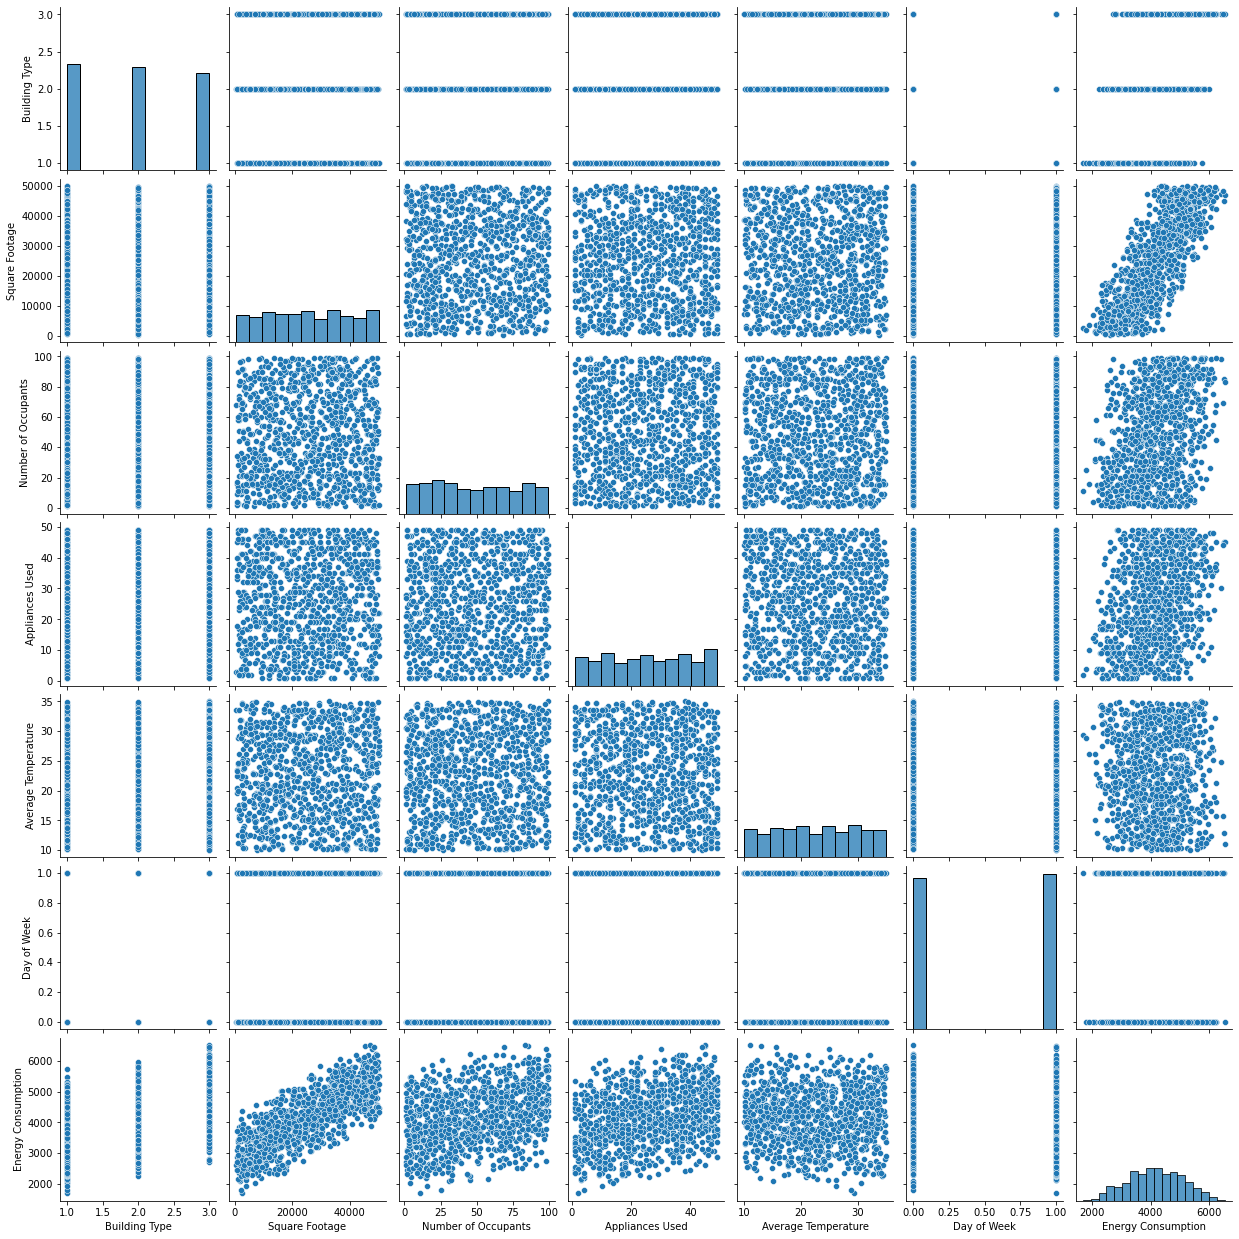

In [9]:
sns.pairplot(data)

In [10]:
# To Cheack Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({"feature":X.columns,'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})

,feature,VIF
0,Building Type,5.443664
1,Square Footage,3.757962
2,Number of Occupants,3.480127
3,Appliances Used,3.723111
4,Average Temperature,6.829692
5,Day of Week,1.945862


In [11]:
{X.columns[i] : variance_inflation_factor(X.values,i) for i in range(1, X.shape[1])}

{'Square Footage': 3.7579621959620906,
 'Number of Occupants': 3.4801265280124998,
 'Appliances Used': 3.723111153648246,
 'Average Temperature': 6.829691930015089,
 'Day of Week': 1.9458617366273416}

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [13]:
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (750, 6)
X_test shape: (250, 6)
y_train shape: (750,)
y_test shape: (250,)


In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.00018384322534060866
R2 Score: 0.9999999997813789


# Import Ridge

In [19]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [20]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = ridge.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 0.013979000761609267
R2 Score: 0.9999999833765707


Lasso Cross Validations

In [22]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso

LassoCV()

In [23]:
lasso.fit(X_train,y_train)

LassoCV()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = lasso.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.0498058076622767
R2 Score: 0.9999963732578546


In [25]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(lasso, file)

Test Data

In [26]:
X.head(4)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,1,7063,76,10,29.84,1
1,2,44372,66,45,16.72,1
2,3,19255,37,17,14.30,0
3,1,13265,14,41,32.82,1


In [27]:
# load The model.pkl
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [28]:
new_data = [[2, 8767, 75,23,23,0]]
new_data = scaler.transform(new_data)
model.predict(new_data)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3534.33816078])

In [29]:
# load the sclar.pkl
with open("scaler.pkl","rb") as file:
    scale = pickle.load(file)

In [30]:
model.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [31]:
for i, col in enumerate(X.columns):
  model.coef_[i]
  print(f"{col}: {model.coef_[i]}")

Building Type: 401.80303085867416
Square Footage: 708.0138148401612
Number of Occupants: 292.4082591355836
Appliances Used: 282.3936884047589
Average Temperature: -34.62548992305448
Day of Week: 24.256211730855068
